<a href="https://colab.research.google.com/github/namans-git/iit_intern/blob/main/Bayes_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bayes Estimator

In estimation theory, a Bayes Estimator [16] is **an estimator that minimizes the posterior expected value of a loss function**. Equivalently, it maximizes the posterior expectation of a utility function.

In other words, it's a term that estimates your unknown parameter in a way that you lose the least amount of accuracy (as compared with having the true value of that parameter).

The bayes estimator is function of observable random variables which we've observed in the process of our analysis. We call our observable variables $X_1,X_2,X_3...X_n$

Our data might be represented by the function $f(x|\theta)$, where $\theta$ is the **prior distribution** which we evaluate.

The **loss function $L(\theta, a)$**, where a $\in$ $\mathbb{R}$, is also a real valued function. Our estimate here is a, and $L(\theta, a)$ tells us how much we lose by using a as an estimate when the true, real value of a parameter is $\theta$.

We find the minimum expected loss by integrating. For a given $X$ = $x$, the expected loss $(E)$ is:

**$E(L(\theta,a)|x) = \int_{Ω} L(\theta,a)p(\theta|x)d\theta$**


In this formula the $\Omega$ (lower bound of the integral) is the range over which $\theta$ is defined. $P(\theta|x)$ is the **likelihood function**; the prior distribution for the parameter $\theta$ over observations $x$.

We call $a(x)$ the point where we reach the minimum expected loss. Then, for $a(x) = \delta(x)$, $\delta(x)$ is the Bayesian estimate of $\theta$.  [17]

Before we move to the application let's take a look at the bayes theorem and bayes estimation together:

Bayes Theorem ~ $\Large{P(A|B) = \frac{P(B|A)P(A)}{P(B)}}$

Where $P(A|B)$ is the **posterior**,  $P(B|A)$ is the **likelihood**, $P(A)$ is the **prior** and $P(B)$ is the **evidence**.


---

Bayes estimation ~ $\Huge{p(\theta|D) = \frac {p(D|\theta)p(\theta)}{\int p(D|\theta)p(\theta)d\theta}}$

Where $p(\theta|D)$ is the **posterior distribution**,  $p(D|\theta)$ is the **likelihood function**,  $p(\theta)$ is the **prior distribution**  and in place of the the traditional evidence we have a $normalizing factor$.

Difference between MLE and Bayes estimation:

*  To solve for parameters in MLE, we take the argmax of the log likelihood
function to get numerical solutions for $(\mu,\sigma^{2})$.

* **In Bayesian estimation, we compute a distribution over the parameter space, called the posterior pdf, denoted as $p(\theta|D)$.**

Let us implement this on real world data [12] ~

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)
import seaborn as sns
from random import choice
from scipy.stats import norm
%matplotlib inline

In [ ]:
#reading the data
df = pd.read_csv("USA_Housing.csv")
true_mean = df['Avg. Area House Age'].mean()
true_var = df['Avg. Area House Age'].var()

In [ ]:
#true mean and variance of our data
true_mean, true_var

(5.977222035280273, 0.9829853565194727)

Text(0, 0.5, 'count')

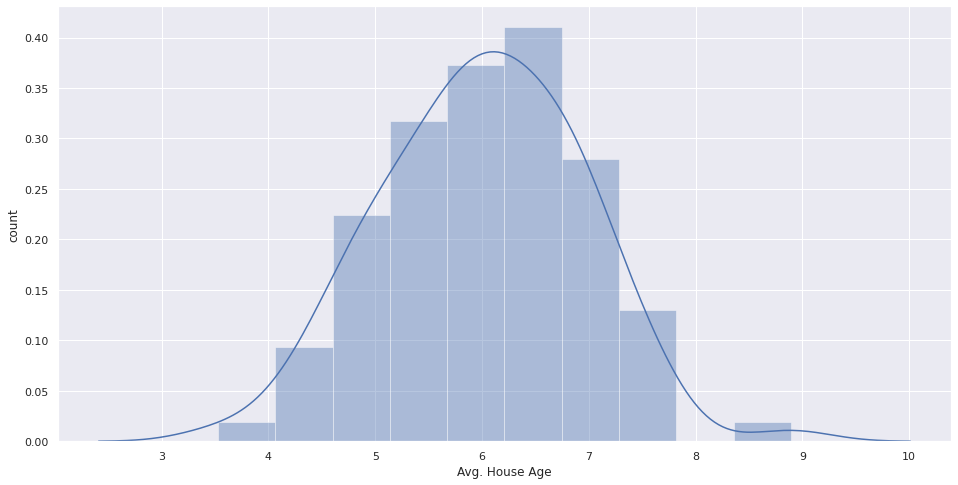

In [ ]:
# generating data(normal distribution) using these conditions
sns.set(rc={'figure.figsize':(16,8)})

n_points = 100
data = np.random.normal(true_mean,np.sqrt(true_var),n_points)
ax = sns.distplot(data)
plt.xlabel('Avg. House Age')
plt.ylabel('count')

In [ ]:
# mean and variance of observed data
np.mean(data), np.var(data)

(6.003606646081015, 0.8685051217898457)

Gaussian Function

In [ ]:
#creating a gauss function
def gaussian_f(m,v,x):

  out = np.zeros(x.shape)
  for i,xx in enumerate(x):
    out[i] = (1 / np.sqrt(2*np.pi*v)) * np.exp(-(xx - m)**2 /  (2*v))
  return out

In [ ]:
# single data prediction
def gaussian(m,v,x):
  out = (1 / np.sqrt(2*np.pi*v)) * np.exp(-(x - m)**2 / (2*v))
  return out

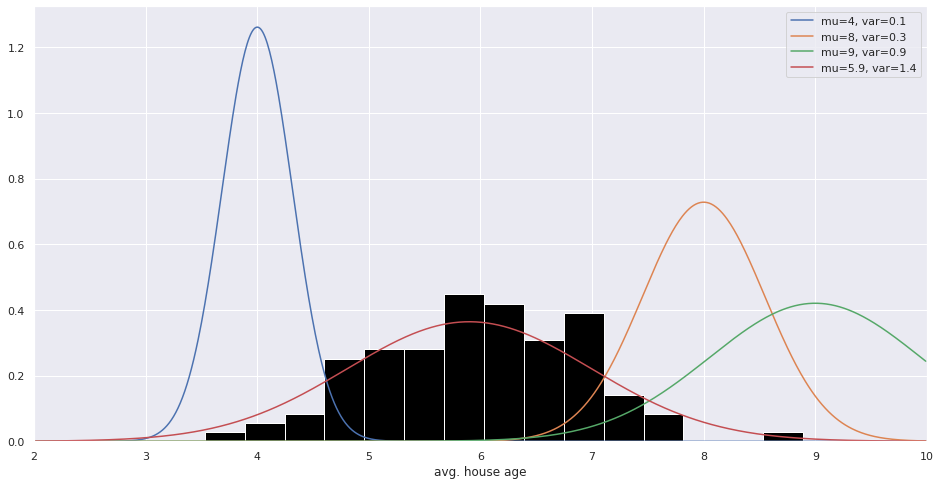

In [ ]:
# plotting possible models for this data

x = np.arange(2, 10, 0.01)

plt.hist(data, bins=15, density=True, color='black')
plt.plot(x, gaussian_f(4, 0.1, x), label='mu=4, var=0.1')
plt.plot(x, gaussian_f(8, 0.3, x), label='mu=8, var=0.3')
plt.plot(x, gaussian_f(9, 0.9, x), label='mu=9, var=0.9')
plt.plot(x, gaussian_f(5.9, 1.2, x), label='mu=5.9, var=1.4')
plt.xlim([2,10])
plt.xlabel('avg. house age')
plt.legend()
plt.show()

Likelihood Function

$\LARGE L(\theta) = \prod_{i=1}^{N}f(x_i|\theta)$

In [ ]:
#we're defining a range of parameters with which we can visualize the maximum of the likelihood function
mus = np.arange(4, 8, 0.1)
var_s = np.arange(0.4, 1.8, 0.1)

In [ ]:
params = np.zeros((len(mus), len(var_s)))
for i,m in enumerate(mus):
  for j,v in enumerate(var_s):
    p = 1
    for x in data:
      p *= gaussian(m, v, x)
    params[i,j] = p

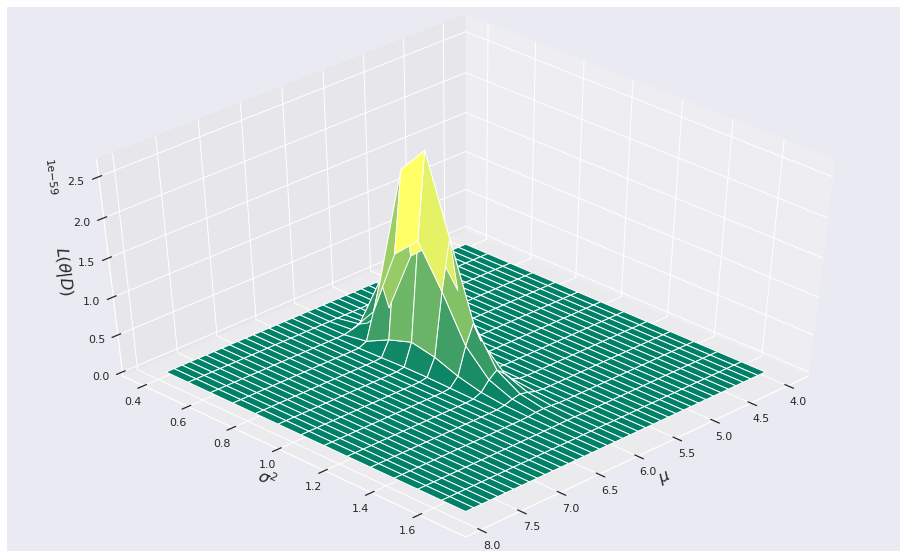

In [ ]:
# plotting likelihood

X,Y = np.meshgrid(var_s, mus)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Y, X, params, cmap='summer')
ax.view_init(azim=45, elev=45)
ax.set_xlabel(r'$\mu$', fontsize=16)
ax.set_ylabel(r'$\sigma^2$', fontsize=16)
ax.set_zlabel(r'$L(\theta|D)$', fontsize=16)
plt.show()

Bayesian Estimation

In [ ]:
# defining a prior distribution

mu_p = 7
var_p = 0.5

priors = np.random.normal(mu_p, np.sqrt(var_p), size=15)

In [ ]:
priors

array([7.61600174, 7.34935814, 7.99332179, 6.76416194, 7.08616744,
       7.08087415, 6.61747632, 7.09148364, 6.89524354, 7.47470717,
       7.13260597, 6.66621881, 8.60847786, 7.81098585, 6.74579545])

In [ ]:
np.mean(priors), np.var(priors)

(7.262191988811509, 0.29040937435763603)

In [ ]:
import math
# multiply likelihood and prior distribution, LL assuming fixed variance

x = np.arange(2, 10, 0.01)

like = gaussian_f(int(np.mean(data)), math.ceil(np.var(data)), x)
prior = gaussian_f(int(np.mean(priors)), math.ceil(np.var(priors)), x)

post = ((like.sum() + prior.sum()) / 2.0) * ((like*prior).astype(float) / (like*prior).astype(float).sum())

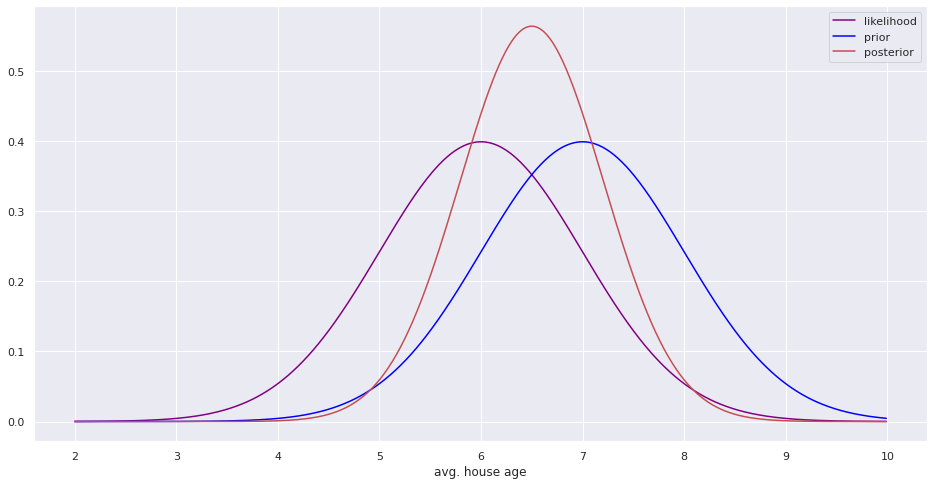

In [ ]:
# plotting 3 distributions

plt.figure(figsize=(16,8))
plt.plot(x, like, 'purple', label='likelihood')
plt.plot(x, prior, 'blue', label='prior')
plt.plot(x, post, 'r', label='posterior')
plt.legend()
plt.xlabel('avg. house age')
plt.show()

In [ ]:
# mu and var of posterior distribution

post_mu = x[np.argmax(post)]

norm =  np.var(like)*true_var
post_var = norm / np.var(post)

post_mu, post_var

(6.499999999999904, 0.5645687471663123)